# Programming Exercise 1 - Linear Regression

1. [warmUpExercise](#1.-warmUpExercise)
2. [Linear regression with one variable](#2.-Linear-regression-with-one-variable)
    1. [Plotting the Data](#2.1-Plotting-the-Data)
    2. [Gradient Descent](#2.2-Gradient-Descent)
        1. [Update Equation](#2.2.1-Update-Equation)
        2. [Computing the cost J](#2.2.3-Computing-the-cost-J)
        3. [Implementation Of Gradient descent](#2.2.4-Gradient-descent)
    3. 
    4. [Visualizing J](#2.4-Visualizing-J)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
% matplotlib inline


## 1. warmUpExercise

In [14]:
def warmUpExercise():
    return np.identity(5)

In [15]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## 2. Linear regression with one variable

### 2.1 Plotting the Data

In [16]:
# read comma separated data
data = np.loadtxt("./1 Linear Regression/machine-learning-ex1/ex1/ex1data1.txt", delimiter=",")

# y is a vector
X, y = np.hsplit(data, 2)
# number of training examples
m = y.size


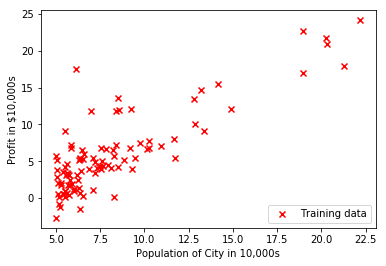

In [17]:
# Plot the data
figure = plt.figure()
ax1 = figure.add_subplot(1, 1, 1)
ax1.scatter(X, y, c="r", marker='x', label="Training data")
# Set the y-axis label
ax1.set_ylabel('Profit in $10,000s')
# Set the x-axis label
ax1.set_xlabel('Population of City in 10,000s')

# show label
ax1.legend(loc='lower right')


### 2.2 Gradient Descent

#### 2.2.1 Update Equation

In [18]:
# Add a column of ones to x
X = np.column_stack((np.ones(data.shape[0]), X))

# initialize fitting parameters
theta = np.zeros((2, 1))

iteration = 1500
alpha = 0.01


#### 2.2.3 Computing the cost J

\begin{align}
\dot{x} & = \sigma(y-x) \ \
    \dot{y} & = \rho x - y - xz \ \
    \dot{z} & = -\beta z + xy
\end{align}

In [19]:
def computeCost(X, y, theta):
    m = y.size
    return np.sum(np.square(X.dot(theta) - y)) / (m * 2)

# You should expect to see a cost of 32.07
assert round(computeCost(X, y, theta), 2) == 32.07


#### 2.2.4 Gradient descent

In [20]:
def gradient_descent(X, Y, theta=None, iteration=1500, alpha=0.01):
    m = Y.size
    if theta is None:
        theta = np.zeros((X.shape[1], 1))
    j_cost_history = np.empty((iteration,))
    for i in np.arange(iteration):
        theta = theta - (alpha / m) * X.T.dot((X.dot(theta) - Y))
        j_cost_history[i] = computeCost(X, Y, theta)
    return theta, j_cost_history


theta:  [-3.63029144  1.16636235]


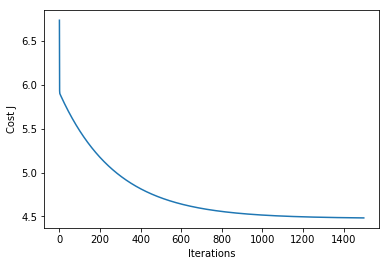

In [21]:
theta, j_cost_history = gradient_descent(X, y, theta=theta, iteration=iteration, alpha=alpha)
print('theta: ', theta.ravel())

plt.plot(j_cost_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');


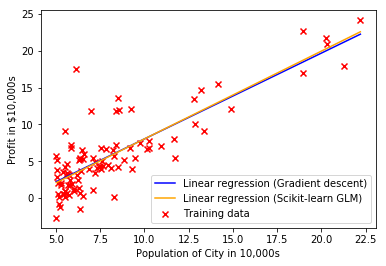

In [22]:
# reuse the previous figure
ax = figure.add_subplot(1, 1, 1)

max_x, max_y = data.max(axis=0)
min_x, min_y = data.min(axis=0)

# Plot gradient descent
simulate_x = np.linspace(min_x, max_x)
simulate_y = theta[0] + simulate_x * theta[1]
ax.plot(simulate_x, simulate_y, c='b', label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression
reg = LinearRegression()
# LinearRegression will take in its fit method arrays X, y 
# and will store the coefficients w of the linear model in its coef_ member
reg.fit(X[:, 1].reshape(-1, 1), y.ravel())
# the vector w = (w1,..., wj) as coef_and w_0 as intercept_.
linear_aprox_skilearn_y = reg.intercept_ + reg.coef_ * simulate_x
ax.plot(simulate_x, linear_aprox_skilearn_y, c='orange', label='Linear regression (Scikit-learn GLM)')

# Now add the legend with some customizations.
ax.legend(loc='lower right')

figure


In [23]:
# Predict profit for a city with population of 35000 and 70000
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)
print(predict1, predict2)

[ 0.45197679] [ 4.53424501]


### 2.4 Visualizing J

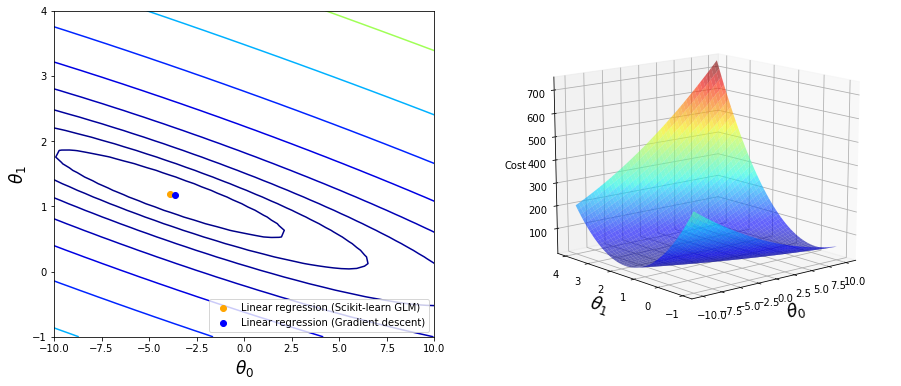

In [24]:
# Create grid coordinates for plotting
T0 = np.linspace(-10, 10)
T1 = np.linspace(-1, 4)
xx, yy = np.meshgrid(T0, T1, indexing='xy')
# initialize J vals to a matrix of 0's
Z = np.zeros((T0.size, T1.size))
# Calculate Z-values (Cost) based on grid of coefficients
# Fill out J.vals
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = computeCost(X, y, theta=[[xx[i, j]], [yy[i, j]]])

cost_fig = plt.figure(figsize=(15, 6))
ax1 = cost_fig.add_subplot(121)
ax2 = cost_fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(reg.intercept_, reg.coef_, c='orange', label='Linear regression (Scikit-learn GLM)')
ax1.scatter(theta[0], theta[1], c='b', label='Linear regression (Gradient descent)')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in cost_fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

ax1.legend(loc='lower right')

cost_fig
